In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('Datasets/df_preprocessed.csv')
df = df.drop(['DAY_OF_WEEK', 'DAY_OF_MONTH', 'MONTH'], axis=1)
df.head()


,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,...,Drizzle,Snow,Wintry Mix,Freezing Rain,MONTH_sin,MONTH_cos,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos
0,3,10,0,124,636,324,323,448,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
1,3,28,0,371,2475,340,333,531,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
2,3,20,1,181,1069,301,341,482,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
3,3,30,0,168,944,345,343,513,48,30,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
4,4,1,0,139,760,360,356,499,46,28,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521


In [6]:
X = df.drop(['DEP_DELAY'], axis=1)
y = df['DEP_DELAY']
y = y.ravel()
print(X.shape, y.shape)


(28820, 32) (28820,)


In [7]:
#smote
sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y)
print(X.shape, y.shape)

(49892, 32) (49892,)


In [8]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#boruta feature selection
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=25)

(39913, 32) (39913,)
(9979, 32) (9979,)


In [9]:
feat_selector.fit(X_train, y_train)

X_train = feat_selector.transform(X_train)

X_test = feat_selector.transform(X_test)

Iteration: 	1 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 25
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 25
Confirmed: 	27
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	13 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 25
Confirmed: 	27
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 25
Confirmed: 	28
Tentative: 	2
Rejected: 	2
Iteration: 	17 / 

In [10]:
#knn, randomforest, logistic regression, decision tree, gaussian naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
models = [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]
dic = {}
i = 0
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #accuracy precision, recall f1 score
    if(i == 0):
        print('KNN', end = ' ')
    elif(i == 1):
        print('Random Forest', end = ' ')
    elif(i == 2):
        print('Logistic Regression', end = ' ')
    elif(i == 3):
        print('Decision Tree', end = ' ')
    elif(i == 4):
        print('Gaussian Naive Bayes', end = ' ')
    i += 1
    dic[model] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
    print(accuracy_score(y_test, y_pred), end = ' ')
    print(precision_score(y_test, y_pred), end = ' ')
    print(recall_score(y_test, y_pred), end = ' ')
    print(f1_score(y_test, y_pred), end = ' ')
    print()

KNN 0.8760396833350035 0.8577150486362769 0.9015637530072174 0.8790929527905385 
Random Forest 0.9396733139593145 0.9826144366197183 0.8951483560545309 0.9368443138900546 
Logistic Regression 0.7199118148111033 0.7344451571520205 0.6886527666399358 0.710812209001552 
Decision Tree 0.9229381701573304 0.9260755402948899 0.919206094627105 0.9226280309890331 
Gaussian Naive Bayes 0.6672011223569496 0.6249437865387498 0.8358059342421812 0.71515567372845 


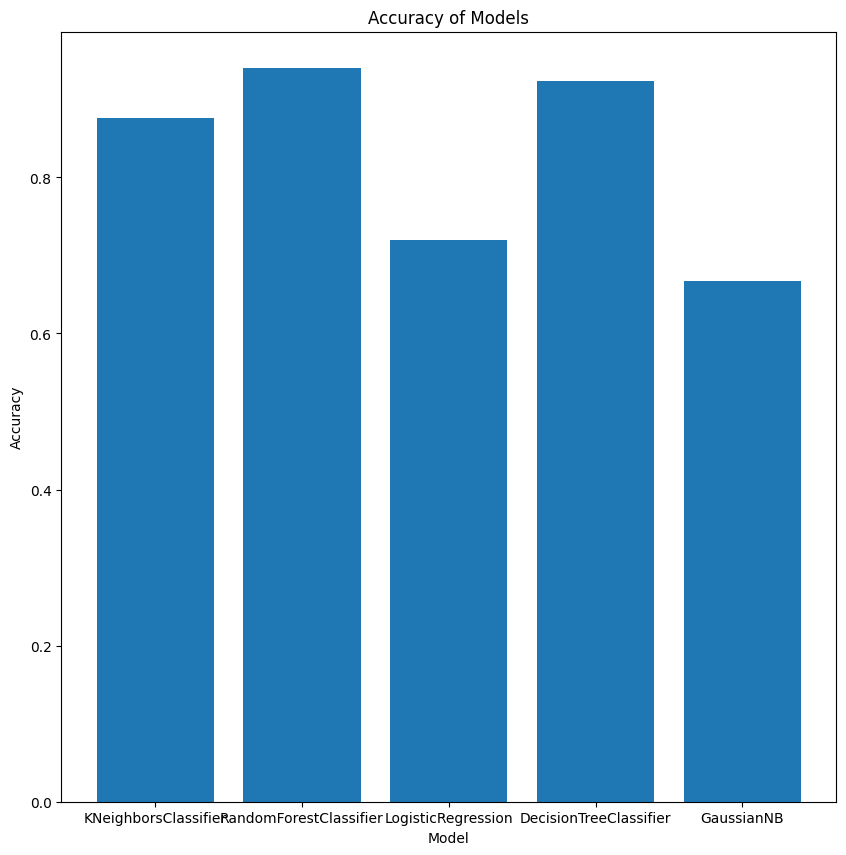

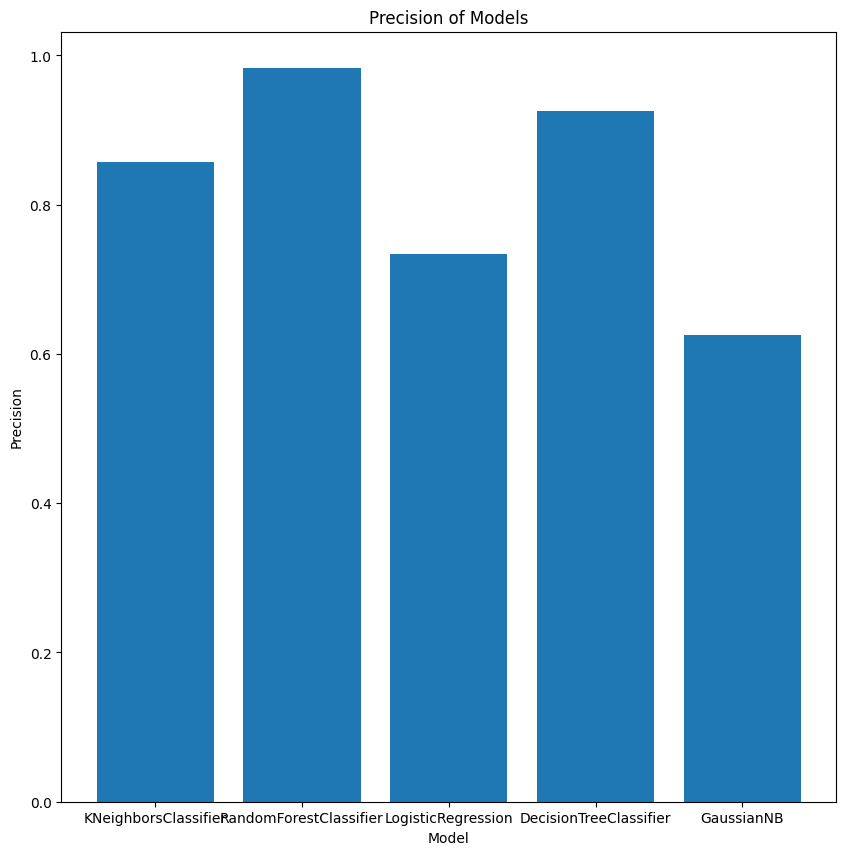

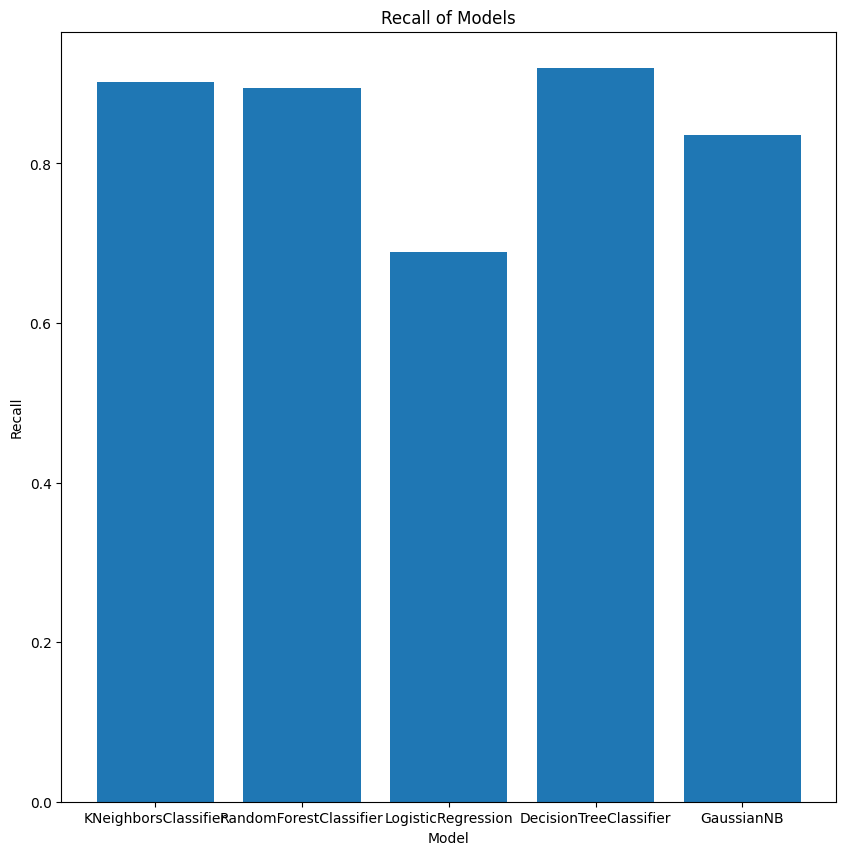

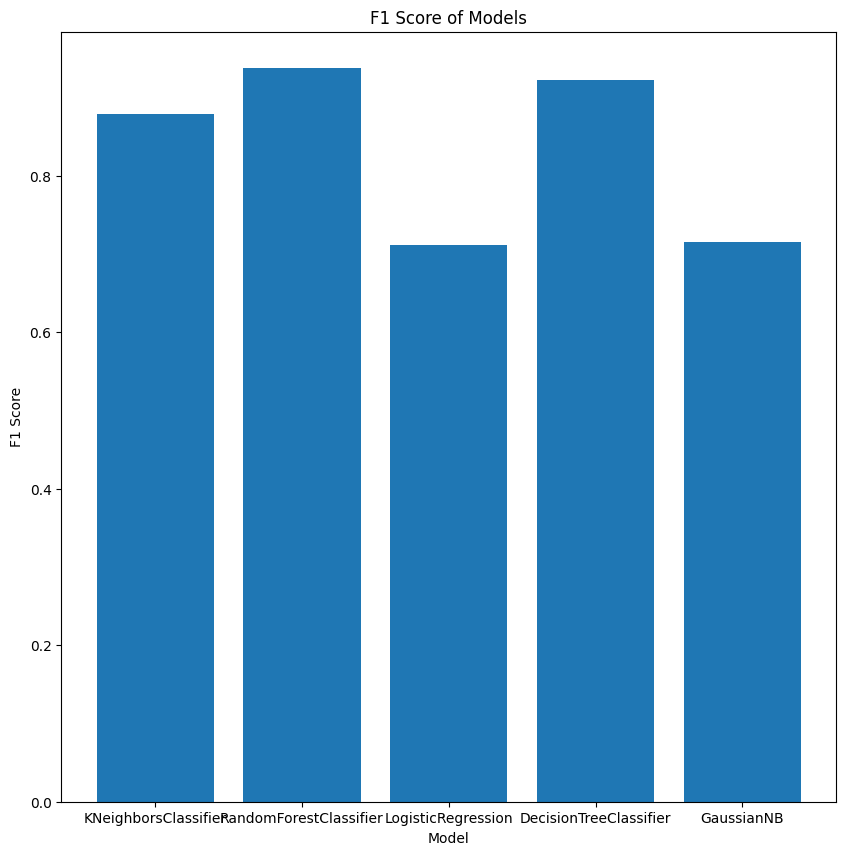

In [11]:
#plot accuracy, precision , recall, f1 score in bar graph format
plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][0] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][1] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][2] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.show()

plt.figure(figsize=(10, 10))
plt.bar(range(len(dic)), [dic[model][3] for model in dic], align='center')
plt.xticks(range(len(dic)), [model.__class__.__name__ for model in dic])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')
plt.show()
